
# 第八章 文本挖掘


![image.png](images/author.png)

What can be learned from 5 million books

https://www.bilibili.com/video/BV1jJ411u7Nd

This talk by Jean-Baptiste Michel and Erez Lieberman Aiden is phenomenal. 


Michel, J.-B., et al. (2011). Quantitative Analysis of Culture Using Millions of Digitized Books. Science, 331, 176–182.

In [1]:
%%html 
<iframe src="//player.bilibili.com/player.html?aid=68934891&bvid=BV1jJ411u7Nd&cid=119471774&page=1" 
width=1000 height=600
scrolling="no" border="0" frameborder="no" framespacing="0" allowfullscreen="true"> </iframe>

![](./img/books.jpg)

试一下谷歌图书的数据: https://books.google.com/ngrams/
    

数据下载： http://www.culturomics.org/home

##  Bag-of-words model （BOW)

Represent text as numerical feature vectors

- We create a vocabulary of unique tokens—for example, words—from the entire set of documents.
- We construct a feature vector from each document that contains the counts of how often each word occurs in the particular document.

Since the unique words in each document represent only a small subset of all the
words in the bag-of-words vocabulary, the feature vectors will consist of mostly
zeros, which is why we call them sparse

![image.png](images/bow.png)

“词袋模型”（Bag of words model）假定对于一个文本：
- 忽略词序、语法、句法；
- 将其仅仅看做是一个词集合或组合；
- 每个词的出现都是独立的，不依赖于其他词是否出现。
    - 文本任意一个位置出现某一个词汇是独立选择的，不受前面句子的影响。

这种假设虽然对自然语言进行了简化，便于模型化。

Document-Term Matrix (DTM)


问题：例如在新闻个性化推荐中，用户对“南京醉酒驾车事故”这个短语很感兴趣。词袋模型忽略了顺序和句法，认为用户对“南京”、“醉酒”、“驾车”和“事故”感兴趣，因此可能推荐出和“南京”、“公交车”、“事故”相关的新闻。

解决方法: 可抽取出整个短语；或者采用高阶（2阶以上）统计语言模型。例如bigram、trigram来将词序保留下来，相当于bag of bigram和bag of trigram。

### Transforming words into feature vectors

A document-term matrix or term-document matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. 

In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. 

There are various schemes for determining the value that each entry in the matrix should take. One such scheme is tf-idf. They are useful in the field of natural language processing.

D1 = "I like databases"

D2 = "I hate databases"

|          |  I        |    like   |hate        | databases   |
| -------------|:-------------:|:-------------:|:-------------:|-----:|
| D1| 1| 1 | 0 |1|
| D2| 1| 0 | 1 |1|

In [3]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(ngram_range=(1, 2))
docs = np.array([
        'The sun is shining',
        'The weather is sweet',
        'The sun is shining and the weather is sweet'])
bag = count.fit_transform(docs)

In [2]:
count?

In [4]:
count.get_feature_names()

['and',
 'and the',
 'is',
 'is shining',
 'is sweet',
 'shining',
 'shining and',
 'sun',
 'sun is',
 'sweet',
 'the',
 'the sun',
 'the weather',
 'weather',
 'weather is']

In [5]:
print(count.vocabulary_) # word: position index

{'the': 5, 'sun': 3, 'is': 1, 'shining': 2, 'weather': 6, 'sweet': 4, 'and': 0}


In [6]:
type(bag)

scipy.sparse.csr.csr_matrix

In [7]:
print(bag.toarray())

[[0 1 1 1 0 1 0]
 [0 1 0 0 1 1 1]
 [1 2 1 1 1 2 1]]


In [8]:
import pandas as pd
pd.DataFrame(bag.toarray(), columns = count.get_feature_names())

and  is  shining  sun  sweet  the  weather
0    0   1        1    1      0    1        0
1    0   1        0    0      1    1        1
2    1   2        1    1      1    2        1

The sequence of items in the bag-of-words model that we just created is also called the 1-gram or unigram model: each item or token in the vocabulary represents a single word. 

## n-gram model
The choice of the number n in the n-gram model depends on the particular application

- 1-gram: "the", "sun", "is", "shining"
- 2-gram: "the sun", "sun is", "is shining" 

The CountVectorizer class in scikit-learn allows us to use different
n-gram models via its `ngram_range` parameter. 

While a 1-gram
representation is used by default

we could switch to a 2-gram
representation by initializing a new CountVectorizer instance with
ngram_range=(2,2).

## TF-IDF
Assessing word relevancy via term frequency-inverse document frequency

$$tf*idf(t, d) = tf(t, d) \times idf(t)$$

- $tf(t, d)$ is the term frequency of term t in document d.
- inverse document frequency $idf(t)$ can be calculated as: $idf(t) = log \frac{n_d}{1 + df(d, t)}$



Question: Why do we add the constant 1 to the denominator ?



The tf-idf equation that was implemented in scikit-learn is as follows: $tf*idf(t, d) = tf(t, d) \times （idf(t, d) + 1）$
 
[SKlearn use `smooth_idf=True`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer) $idf(t) = log \frac{1+n_d}{1 + df(d, t)} + 1$

where $n_d$ is the total number of documents, and $df(d, t)$ is the number of documents $d$ that contain the term $t$. 


 
### L2-normalization

$$l2_{x} = \frac{x} {\sqrt{\sum {x^2}}}$$



课堂作业：请根据公式计算'is'这个词在文本2中的tfidf数值？

![](./img/ask.jpeg)

### TfidfTransformer
Scikit-learn implements yet another transformer, the TfidfTransformer, that
takes the raw term frequencies from CountVectorizer as input and transforms
them into tf-idfs:

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())


[[0.   0.43 0.56 0.56 0.   0.43 0.  ]
 [0.   0.43 0.   0.   0.56 0.43 0.56]
 [0.4  0.48 0.31 0.31 0.31 0.48 0.31]]


In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

tfidf = TfidfTransformer(use_idf=True, norm=None, smooth_idf=True)
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())


[[0.   1.   1.29 1.29 0.   1.   0.  ]
 [0.   1.   0.   0.   1.29 1.   1.29]
 [1.69 2.   1.29 1.29 1.29 2.   1.29]]


In [30]:
import pandas as pd
bag = tfidf.fit_transform(count.fit_transform(docs))
pd.DataFrame(bag.toarray(), columns = count.get_feature_names())

and   is   shining       sun     sweet  the   weather
0  0.000000  1.0  1.287682  1.287682  0.000000  1.0  0.000000
1  0.000000  1.0  0.000000  0.000000  1.287682  1.0  1.287682
2  1.693147  2.0  1.287682  1.287682  1.287682  2.0  1.287682

In [31]:
# 一个词的tfidf值
import numpy as np
tf_is = 2.0
n_docs = 3.0
# smooth_idf=True & norm = None
idf_is = np.log((1+n_docs) / (1+3)) + 1

tfidf_is = tf_is * idf_is
print('tf-idf of term "is" = %.2f' % tfidf_is)

tf-idf of term "is" = 2.00


In [32]:
# *最后一个文本*里的词的tfidf原始数值（未标准化）
tfidf = TfidfTransformer(use_idf=True, norm=None, smooth_idf=True)
raw_tfidf = tfidf.fit_transform(count.fit_transform(docs)).toarray()[-1]
raw_tfidf, count.get_feature_names()

(array([1.69, 2.  , 1.29, 1.29, 1.29, 2.  , 1.29]),
 ['and', 'is', 'shining', 'sun', 'sweet', 'the', 'weather'])

In [33]:
# l2标准化后的tfidf数值
l2_tfidf = raw_tfidf / np.sqrt(np.sum(raw_tfidf**2))
l2_tfidf 

array([0.4 , 0.48, 0.31, 0.31, 0.31, 0.48, 0.31])

## 政府工作报告文本挖掘

### 0. 读取数据

In [10]:
with open('../data/gov_reports1954-2017.txt', 'r', encoding = 'utf-8') as f:
    reports = f.readlines()

In [11]:
len(reports)

48

In [15]:
print(reports[0][:1000])

1954	1954年政府工作报告——1954年5月23日在中华人民共和国第一届全国人民代表大会第一次会议上　　　　　　　　　　　　　　　　　　　　　　　　  国务院总理周恩来各位代表：　　我们第一届全国人民代表大会第一次会议，在听了刘少奇同志关于宪法草案的报告并进行了三天的讨论以后，已经光荣地完成了一件历史性的工作，通过了我们国家的根本法——中华人民共和国宪法，接着，又通过了几个重要的法律。现在，我代表中央人民政府作工作报告。　　我国伟大的人民革命的根本目的，是在于从帝国主义、封建主义和官僚资本主义的压迫下面，最后也从资本主义的束缚和小生产的限制下面，解放我国的生产力，使我国国民经济能够沿着社会主义的道路而得到有计划的迅速的发展，以便提高人民的物质生活和文化生活的水平，并且巩固我们国家的独立和安全。我国的经济原来是很落后的；如果我们不建设起强大的现代化的工业、现代化的农业、现代化的交通运输业和现代化的国防，我们就不能摆脱落后和贫困，我们的革命就不能达到目的。在一九四九年至一九五二年间，中央人民政府按照中国人民政治协商会议共同纲领的规定，先后完成了全国大陆的统一，完成了土地制度的改革，进行了广泛的和深入的镇压反革命运动和各种民主改革运动，恢复了遭受长期战争破坏的国民经济，着重地发展了社会主义的国营经济和各种类型的合作社经济，初步地调整了公私营工商业之间的关系，这一切都为有计划地进行经济建设和逐步过渡到社会主义社会准备了必要的条件。随后，从一九五三年起，我国就开始了经济建设的第一个五年计划，着手有系统地逐步地实现国家的社会主义工业化和对农业、手工业和资本主义工商业的社会主义改造。经济建设工作在整个国家生活中已经居于首要的地位。　　制订第一个五年计划的全部工作现在还没有最后完成，对于计划的许多细节还在进行补充和修订。第一个五年计划的方针是大家已经知道的，这就是：集中主要力量发展重工业，建立国家工业化和国防现代化的基础；相应地发展交通运输业、轻工业、农业和商业；相应地培养建设人才；有步骤地促进农业、手工业的合作化；继续进行对资本主义工商业的改造；保证国民经济中社会主义成份的比重稳步增长，同时正确地发挥个体农业、手工业和资本主义工商业的作用；保证在发展生产的基础上逐步提高人民物质生活和文化生活的水平。第一个五年计划所以要集中主要力量发展重工业，即冶金工业、燃料工业、动力工业、

In [16]:
print(reports[4][:500])

1959						1959年国务院政府工作报告	——1959年4月18日在第二届全国人民代表大会第一次会议上	　　　　　　　　　　　　　　　　  国务院总理周恩来	各位代表：	　　我现在根据国务院的决定，向第二届全国人民代表大会第一次会议作政府工作报告。	　　一、第一个五年计划时期内和第二个五年计划的第一年——一九五八年的伟大成就	　　在第一届全国人民代表大会的四年多的任期中间，我们的国家经历了一系列的具有重大历史意义的变化。	　　当一九五四年第一届全国人民代表大会第一次会议召开的时候，我国社会主义经济已经在国民经济中居于主导的地位，但是，我国还存在着大量的资本主义的工业和商业，并且大量地存在着个体的农业和手工业。农村中劳动互助运动已经广泛地发展起来，参加农业劳动互助组的农户达到了百分之六十左右，但是，组成农业生产合作社的农户还只占农户总数的百分之二左右。在那时候，我国已经完成了经济恢复时期的任务，开始了大规模的、有计划的经济建设。但是，究竟我们能不能在一个较短的时间内，使我国这样一个有六亿多人口的大国，建立起社会主义工业化的基础来，还有待于事实的证明。而现在呢？大家看到，只经过四年


 pip install jieba
> https://github.com/fxsjy/jieba

 pip install wordcloud
>  https://github.com/amueller/word_cloud

 pip install gensim


In [20]:
pip install gensim

     |████████████████████████████████| 24.2 MB 376 kB/s eta 0:00:01
     |████████████████████████████████| 103 kB 625 kB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-2.0.0-py3-none-any.whl size=101341 sha256=373e4939f516de66ae607886c52d7a00529e0930868ce9f5ae1ecec2297f40f4
  Stored in directory: /Users/datalab/Library/Caches/pip/wheels/bb/1c/9c/412ec03f6d5ac7d41f4b965bde3fc0d1bd201da5ba3e2636de
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [21]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sys 
import numpy as np
from collections import defaultdict
import statsmodels.api as sm
from wordcloud import WordCloud
import jieba
import matplotlib
import gensim
from gensim import corpora, models, similarities
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
#matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 
matplotlib.rc("savefig", dpi=400)

In [75]:
# 为了确保中文可以在matplotlib里正确显示
#matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 
# 需要确定系统安装了Microsoft YaHei

In [76]:
# import matplotlib
# my_font = matplotlib.font_manager.FontProperties(
#     fname='/Users/chengjun/github/cjc/data/msyh.ttf')

### 1. 分词

In [34]:
import jieba

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print(", ".join(seg_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/8b/hhnbt0nd4zsg2qhxc28q23w80000gn/T/jieba.cache
Loading model cost 0.941 seconds.
Prefix dict has been built successfully.


Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦
小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


## 2. 停用词

In [35]:
filename = '../data/stopwords.txt'
stopwords = {}
f = open(filename, 'r')
line = f.readline().rstrip()
while line:
    stopwords.setdefault(line, 0)
    stopwords[line] = 1
    line = f.readline().rstrip()
f.close()


In [36]:
adding_stopwords = [u'我们', u'要', u'地', u'有', u'这', u'人',
                    u'发展',u'建设',u'加强',u'继续',u'对',u'等',
                    u'推进',u'工作',u'增加']
for s in adding_stopwords: stopwords[s]=10

### 3. 关键词抽取

#### 基于TF-IDF 算法的关键词抽取

In [37]:
import jieba.analyse
txt = reports[-1]
tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)

In [38]:
u"、".join([i[0] for i in tf[:50]])

'发展、改革、推进、建设、加强、加快、推动、深化、完善、创新、就业、全面、促进、经济、政府、深入、实施、提高、企业、支持、群众、服务、坚持、人民、坚决、制度、治理、政策、农村、试点、扩大、机制、社会、落实、工作、保障、增长、国家、生态、安全、今年、稳定、继续、地区、保护、中国、合作、产能、维护、重点'

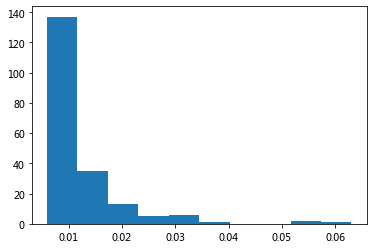

In [39]:
plt.hist([i[1] for i in tf])
plt.show()

#### 基于 TextRank 算法的关键词抽取

In [40]:
tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
u"、".join([i[0] for i in tr[:50]])

'发展、改革、推进、建设、经济、加强、推动、加快、政府、完善、创新、企业、全面、实施、促进、提高、支持、服务、政策、深入、中国、就业、国家、制度、群众、社会、人民、地区、坚持、扩大、农村、地方、保护、继续、增长、机制、工作、保障、治理、试点、合作、综合、重点、市场、投资、领域、加大、消费、制定、维护'

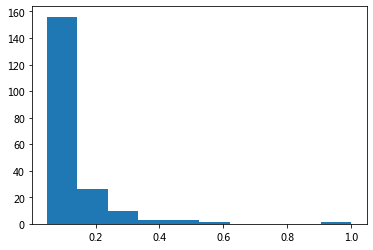

In [41]:
plt.hist([i[1] for i in tr])
plt.show()

In [42]:
import pandas as pd

def keywords(index):
    txt = reports[-index]
    tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)
    tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
    tfdata = pd.DataFrame(tf, columns=['word', 'tfidf'])
    trdata = pd.DataFrame(tr, columns=['word', 'textrank'])
    worddata = pd.merge(tfdata, trdata, on='word')
    fig = plt.figure(figsize=(16, 6),facecolor='white')
    plt.plot(worddata.tfidf, worddata.textrank, linestyle='',marker='.')
    for i in range(len(worddata.word)):
        plt.text(worddata.tfidf[i], worddata.textrank[i], worddata.word[i], 
                 fontsize = worddata.textrank[i]*30, 
                 color = 'red', rotation = 0
                )
    plt.title(txt[:4])
    plt.xlabel('Tf-Idf')
    plt.ylabel('TextRank')
    plt.show()

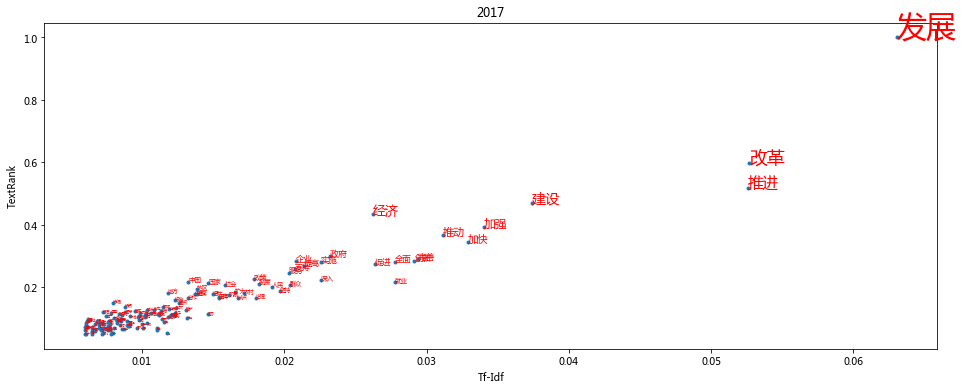

In [43]:
keywords(1)

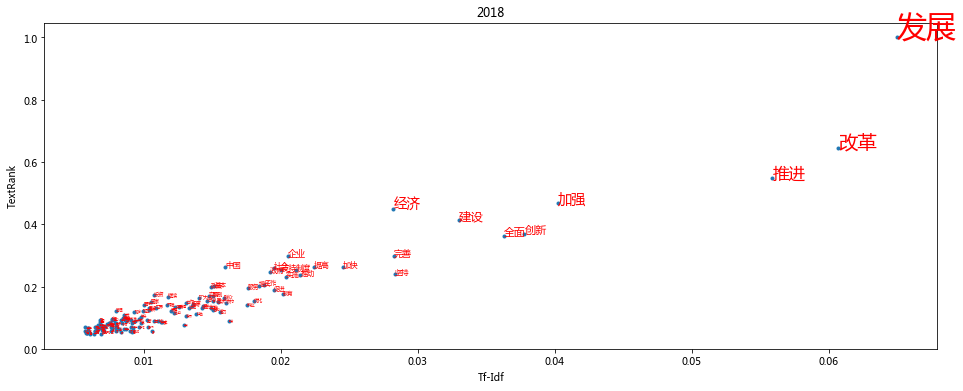

In [86]:
keywords(2)

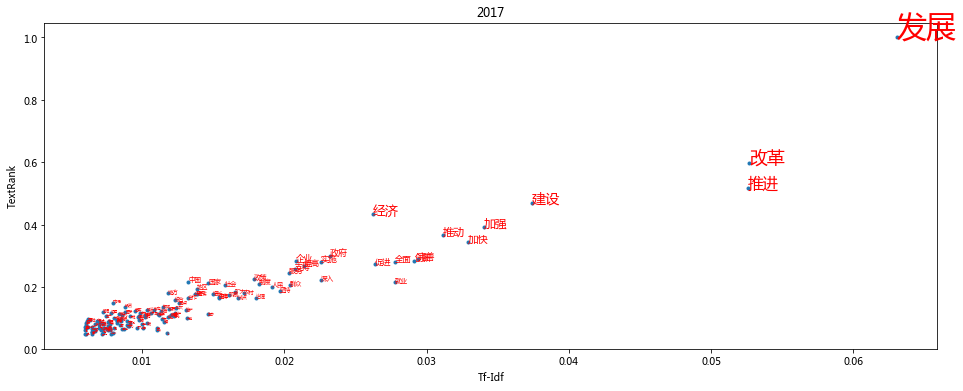

In [87]:
keywords(3)

TextRank: Bringing Order into Texts

基本思想:

* 将待抽取关键词的文本进行分词
* 以固定窗口大小(默认为5，通过span属性调整)，词之间的共现关系，构建图
* 计算图中节点的PageRank，注意是无向带权图

### 4. 词云

In [44]:
def wordcloudplot(txt, year):
    wordcloud = WordCloud(font_path='../data/msyh.ttf').generate(txt)
    # Open a plot of the generated image.
    fig = plt.figure(figsize=(16, 6),facecolor='white')
    plt.imshow(wordcloud)
    plt.title(year)
    plt.axis("off")
    #plt.show()

#### 基于tfidf过滤的词云

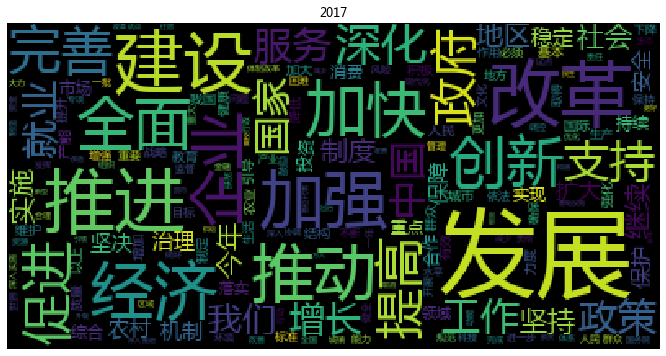

In [45]:
txt = reports[-1]
tfidf200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i in tfidf200]
txt200 = r' '.join(seg_list)
wordcloudplot(txt200, txt[:4]) 

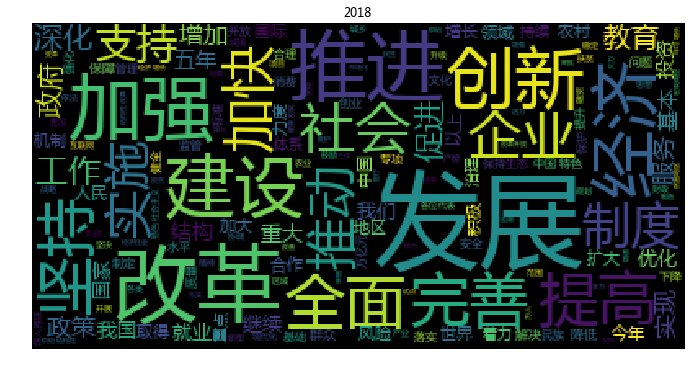

In [24]:
txt = reports[-2]
tfidf200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i in tfidf200]
txt200 = r' '.join(seg_list)
wordcloudplot(txt200, txt[:4]) 

In [59]:
wordfreq = defaultdict(int)
for i in seg_list:
    wordfreq[i] +=1
wordfreq = [[i, wordfreq[i]] for i in wordfreq]

wordfreq.sort(key= lambda x:x[1], reverse = True )
u"、 ".join([ i[0] + u'（' + str(i[1]) +u'）' for i in wordfreq ])

'发展（125）、 改革（68）、 推进（65）、 建设（54）、 经济（52）、 加强（45）、 推动（42）、 加快（40）、 政府（36）、 创新（36）、 完善（35）、 企业（35）、 全面（35）、 促进（34）、 提高（32）、 就业（31）、 实施（31）、 中国（31）、 支持（29）、 深化（29）、 政策（28）、 服务（27）、 国家（26）、 人民（26）、 工作（26）、 制度（25）、 我们（25）、 深入（25）、 社会（25）、 增长（25）、 群众（24）、 坚持（24）、 今年（23）、 继续（23）、 地区（22）、 扩大（22）、 农村（20）、 坚决（20）、 机制（19）、 治理（19）、 稳定（19）、 地方（19）、 保障（18）、 安全（18）、 保护（18）、 持续（17）、 合作（17）、 市场（17）、 重点（17）、 实现（17）、 消费（16）、 投资（16）、 综合（16）、 落实（16）、 试点（16）、 结构（15）、 有效（15）、 维护（15）、 加大（15）、 产能（15）、 积极（15）、 领域（15）、 教育（15）、 改善（14）、 国际（14）、 国内（14）、 城市（14）、 我国（14）、 生态（14）、 以上（14）、 基本（14）、 问题（14）、 强化（13）、 增加（13）、 农业（13）、 提升（13）、 制定（13）、 力度（13）、 质量（13）、 引导（13）、 降低（13）、 依法（12）、 战略（12）、 升级（12）、 重要（12）、 标准（12）、 作用（12）、 健康（12）、 保持（12）、 增强（12）、 生产（12）、 文化（12）、 更加（12）、 必须（12）、 创业（12）、 目标（12）、 民生（12）、 下降（12）、 确保（11）、 取得（11）、 供给（11）、 生活（11）、 核心（11）、 规范（11）、 环境（11）、 收费（11）、 进一步（11）、 管理（11）、 做好（10）、 完成（10）、 资金（10）、 能力（10）、 不断（10）、 开展（10）、 产业（10）、 健全（10）、 水平（10）、 科技（10）、 体系（10）、 风险（10）、 世界（10）、 鼓励（10）、 重大（10）、 一年（10）、 监管（10

#### 基于停用词过滤的词云

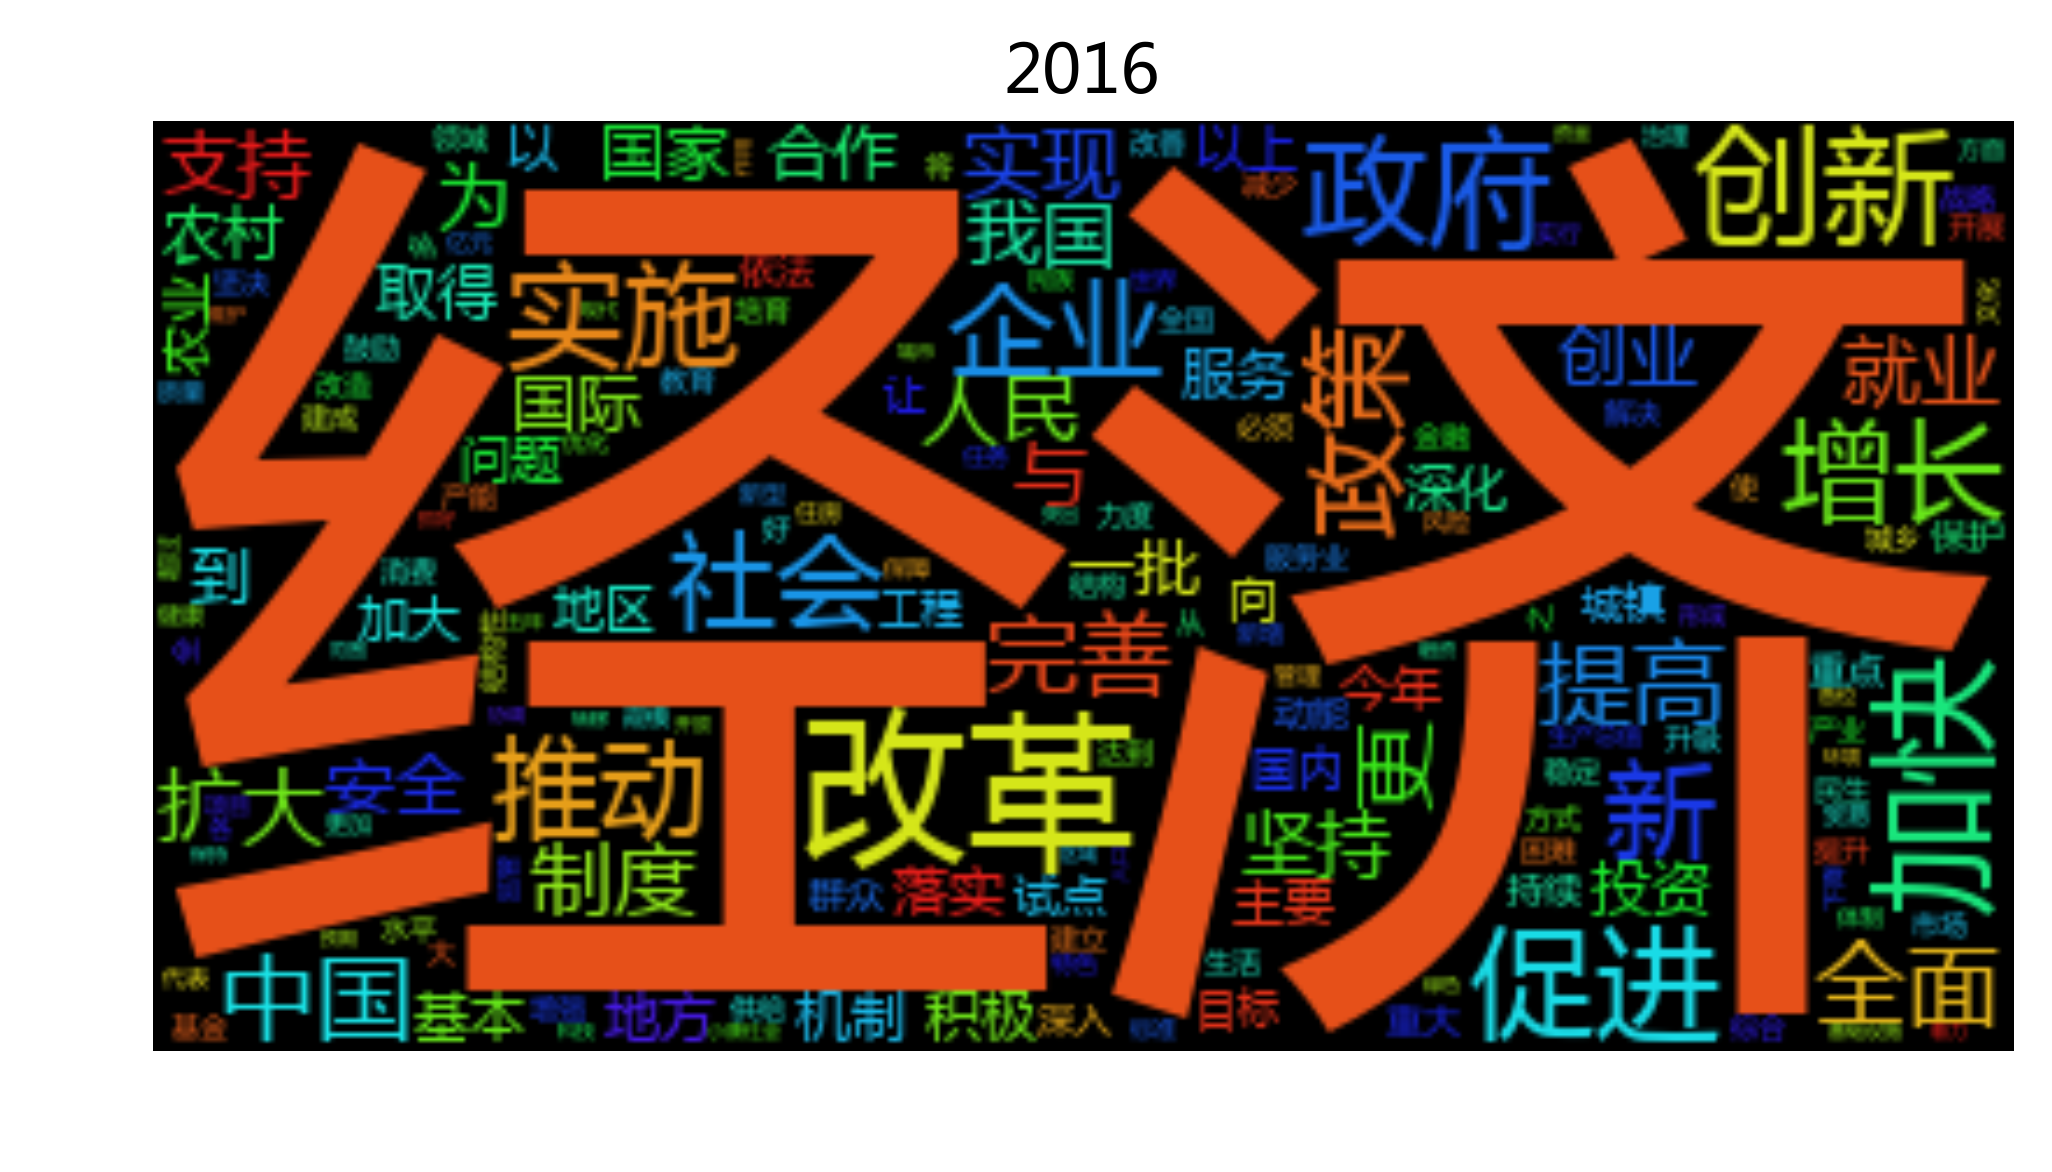

In [70]:
#jieba.add_word('股灾', freq=100, tag=None) 

txt = reports[-1]
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i not in stopwords]
txt = r' '.join(seg_list)
wordcloudplot(txt, txt[:4])  
#file_path = '/Users/chengjun/GitHub/cjc2016/figures/wordcloud-' + txt[:4] + '.png'
#plt.savefig(file_path,dpi = 300, bbox_inches="tight",transparent = True)

### 绘制1954-2016政府工作报告词云

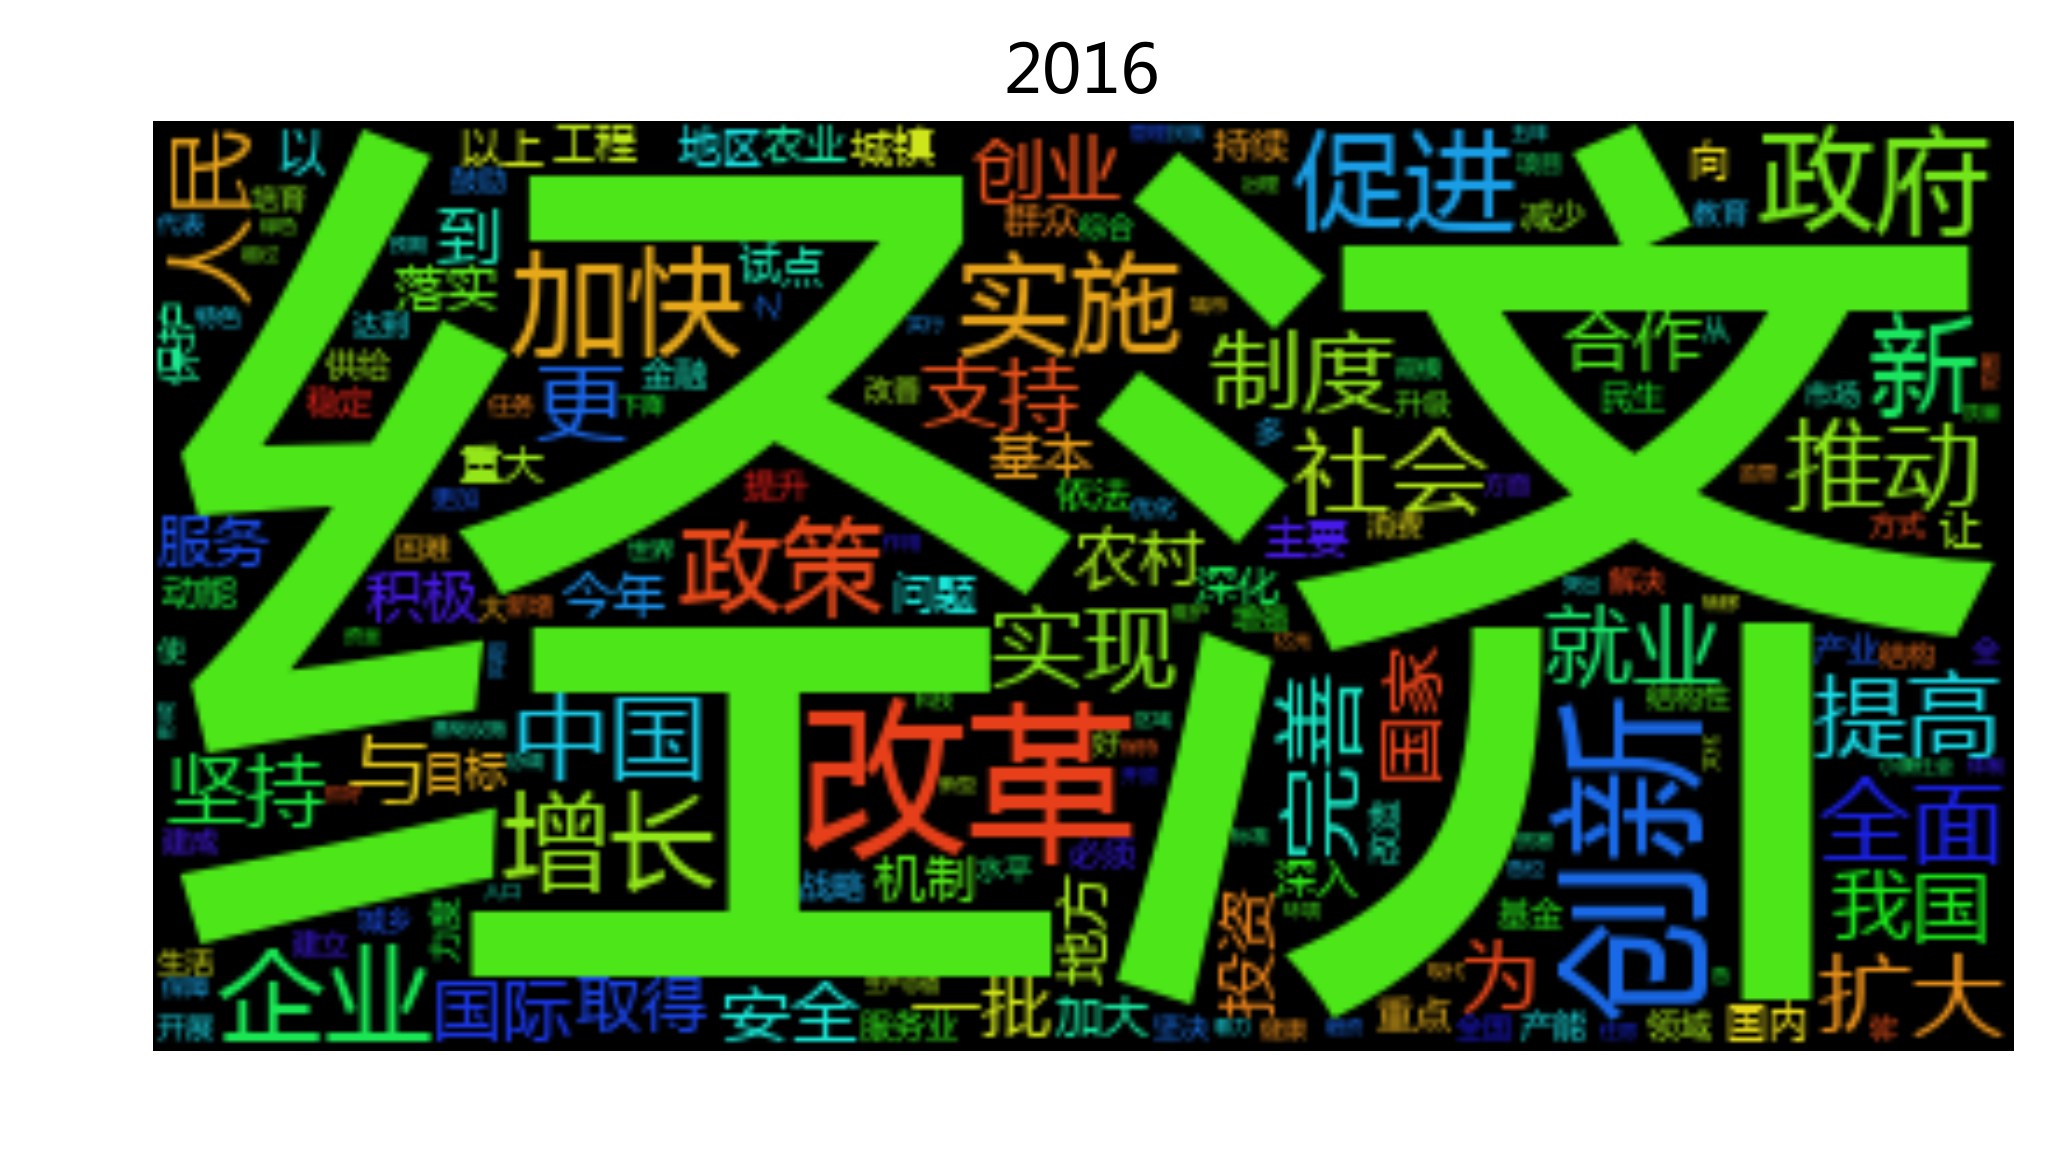

In [113]:
#jieba.add_word('股灾', freq=100, tag=None) 

for txt in reports:
    seg_list = jieba.cut(txt, cut_all=False)
    seg_list = [i for i in seg_list if i not in stopwords]
    txt = r' '.join(seg_list)
    wordcloudplot(txt, txt[:4]) 
    file_path = '../figure/wordcloud-' + txt[:4] + '.png'
    plt.savefig(file_path,dpi = 400, bbox_inches="tight",\
                transparent = True)


## 5. 词向量的时间序列

In [89]:
reports[0][:500]

'1954\t1954年政府工作报告——1954年5月23日在中华人民共和国第一届全国人民代表大会第一次会议上\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\xa0 国务院总理周恩来各位代表：\u3000\u3000我们第一届全国人民代表大会第一次会议，在听了刘少奇同志关于宪法草案的报告并进行了三天的讨论以后，已经光荣地完成了一件历史性的工作，通过了我们国家的根本法——中华人民共和国宪法，接着，又通过了几个重要的法律。现在，我代表中央人民政府作工作报告。\u3000\u3000我国伟大的人民革命的根本目的，是在于从帝国主义、封建主义和官僚资本主义的压迫下面，最后也从资本主义的束缚和小生产的限制下面，解放我国的生产力，使我国国民经济能够沿着社会主义的道路而得到有计划的迅速的发展，以便提高人民的物质生活和文化生活的水平，并且巩固我们国家的独立和安全。我国的经济原来是很落后的；如果我们不建设起强大的现代化的工业、现代化的农业、现代化的交通运输业和现代化的国防，我们就不能摆脱落后和贫困，我们的革命就不能达到目的。在一九四九年至一九五二年间，中央人民政府按照中国人民政治协商会议共同纲领的规定，先后完成了全国大陆的统一，完成了土地制度的改革，进'

In [90]:
reports[1][:500]

'1955\t1955年国务院政府工作报告关于发展国民经济的第一个五年计划的报告\xa0——1955年7月5日至6日在第一届全国人民代表大会第二次会议上\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000\xa0 国务院副总理兼国家计划委员会主任李富春目录\xa0 一、国家在过渡时期的总任务\xa0 二、第一个五年计划概要\xa0 三、第一个五年计划的若干问题\xa0 （一）关于工业和运输业的基本建设问题\xa0 （二）关于工业的生产问题\xa0 （三）关于农业的增产问题\xa0 （四）关于对资本主义工商业的社会主义改造问题\xa0 （五）关于保证市场的稳定问题\xa0 （六）关于培养建设干部问题\xa0 （七）关于提高人民的物质生活和文化生活的水平问题\xa0 （八）关于厉行节约问题\xa0 （九）关于苏联和各人民民主国家同我国建设的关系\u3000四、为完成和超额完成第一个五年计划而奋斗\t\t\u3000\u3000各位代表：\u3000\u3000中华人民共和国国务院向第一届全国人民代表大会第二次会议提出关于发展国民经济第一个五年计划的议案，我现在代表国务院向本次大会作关于第一个五年计划的报告。\u3000\u3000中华人民共和国发展国民经济的第一个五年计划草案，是在中国共产党中央委员会和毛泽东主席的直接领导下编制完成的。一九五五年三月间经过中国共产党的全国代表会'

In [27]:
test = jieba.analyse.textrank(reports[0], topK=200, withWeight=False)

In [57]:
test = jieba.analyse.extract_tags(reports[1], topK=200, withWeight=False)

In [59]:
help(jieba.analyse.extract_tags)

Help on method extract_tags in module jieba.analyse.tfidf:

extract_tags(sentence, topK=20, withWeight=False, allowPOS=(), withFlag=False) method of jieba.analyse.tfidf.TFIDF instance
    Extract keywords from sentence using TF-IDF algorithm.
    Parameter:
        - topK: return how many top keywords. `None` for all possible words.
        - withWeight: if True, return a list of (word, weight);
                      if False, return a list of words.
        - allowPOS: the allowed POS list eg. ['ns', 'n', 'vn', 'v','nr'].
                    if the POS of w is not in this list,it will be filtered.
        - withFlag: only work with allowPOS is not empty.
                    if True, return a list of pair(word, weight) like posseg.cut
                    if False, return a list of words



In [127]:
import jieba.analyse

wordset = []
for k, txt in enumerate(reports):
    print(k)
    top20= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
    for w in top20:
        if w not in wordset:
            wordset.append(w)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


In [128]:
len(wordset)

1717

In [129]:
print(' '.join(wordset))

人民 我们 国家 我国 一九五三年 工业 一九五四年 必须 工作 建设 发展 和平 一九四九年 社会主义 一九五 国家机关 生产 计划 全国 农业 亚洲 美国 事业 企业 应当 经济 这些 改造 增加 并且 完成 但是 已经 等于 合作社 集团 方面 需要 台湾 资本主义 反对 几年 生活 建立 为了 技术 这个 进行 日内瓦 问题 一九五二年 各级 侵略 中央人民政府 可以 比重 改善 东南亚 现代化 中国 关系 反革命 卖国 会议 对于 条约 浪费 加强 注意 保证 任务 努力 正在 军事同盟 根据 能够 组织 基本建设 克服 少数民族 文化 全国人民代表大会 许多 工作人员 总产值 领导 职工 协议 重要 过去 困难 提高 战争 印度支那 今年 迅速 政府 逐步 国营商业 合作 五年 现在 参加 集体 他们 分子 一切 世界 公私合营 解决 商业 机关 得到 现象 因为 今后 其他 民主 胜利 完全 力量 斗争 苏联 群众 地方 计划供应 朝鲜 防务 五年计划 容许 重工业 改进 没有 百分之三十 实行 不能 人民代表大会 所谓 财政 政策 解放 社会 广大 运动 产量 很大 充分 缺点 安全 官僚主义 国营 巩固 不少 落后 增长 达到 一个 恢复 由于 农民 交通运输业 原则 中华人民共和国 而且 各国 中央 依靠 教育 人民共和国 实现 选举 节约 四点 破坏 关于 代表 保障 工业化 破坏活动 时期 作用 百分之八十 资金 采取 棉花 保卫 利益 同时 权利 主要 或者 华侨 制度 不顾 继续 法律 劳动 蒋介石 预算 就是 应该 增产 第一个 私营 国民经济 工商业 单位 一九五七年 可能 年产能力 过渡时期 适当 规定 基础 各种 供应 产品 万吨 水平 投资 帮助 手工业 这种 设计 限额 工厂 粮食 这样 扩大 形式 合作化 制造 积极 条件 工人 建成 资本家 部门 铁路 非生产性 原料 援助 收购 工业生产 因此 方针 加以 两年 经验 规模 新建 工程 全部 超额完成 总任务 设备 中国共产党 厂矿 指标 工人阶级 轻工业 产值 办法 百分之五十 定货 必要 周转量 文化教育 以上 情况 特别 学习 团结 某些 错误 职员 发挥 重大 施工 培养 百分之七十 工业品 播种面积 有些 一些 按照 地区 它们 巨大 要求 开始 百分之一百 曾

In [38]:
from collections import defaultdict

data = defaultdict(dict)
years = [int(i[:4]) for i in reports]
for i in wordset:
    for year in years:
        data[i][year] = 0 

In [39]:
for txt in reports:
    year = int(txt[:4])
    top1000= jieba.analyse.textrank(txt, topK=1000, withWeight=True)
    for ww in top1000:
        word, weight = ww
        if word in wordset:
            data[word][year]+= weight

In [45]:
word_weight = []
for i in data:
    word_weight.append([i, np.sum(list(data[i].values()))])

In [47]:
word_weight.sort(key= lambda x:x[1], reverse = True )
top50 = [i[0] for i in word_weight[:50]]

In [48]:
' '.join(top50) 

'发展 建设 经济 加强 企业 工作 改革 国家 人民 继续 社会主义 提高 社会 生产 农业 政府 制度 增加 推进 问题 促进 增长 加快 农村 方面 管理 进行 重点 坚持 全国 教育 市场 投资 完善 地区 工业 支持 政策 中国 实行 计划 文化 生活 扩大 实现 基本 改善 建立 群众 技术'

In [52]:
def plotEvolution(word, color, linestyle, marker):
    cx = data[word]
    plt.plot(list(cx.keys()), list(cx.values()), color = color, 
             linestyle=linestyle, marker=marker, label= word)
    plt.legend(loc=2,fontsize=8)
    plt.ylabel(u'词语重要性')


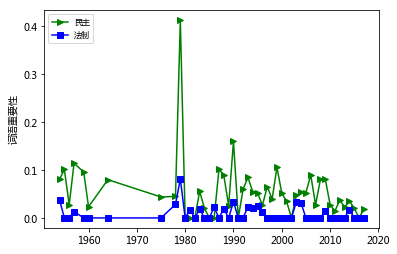

In [53]:
plotEvolution(u'民主', 'g', '-', '>')
plotEvolution(u'法制', 'b', '-', 's')

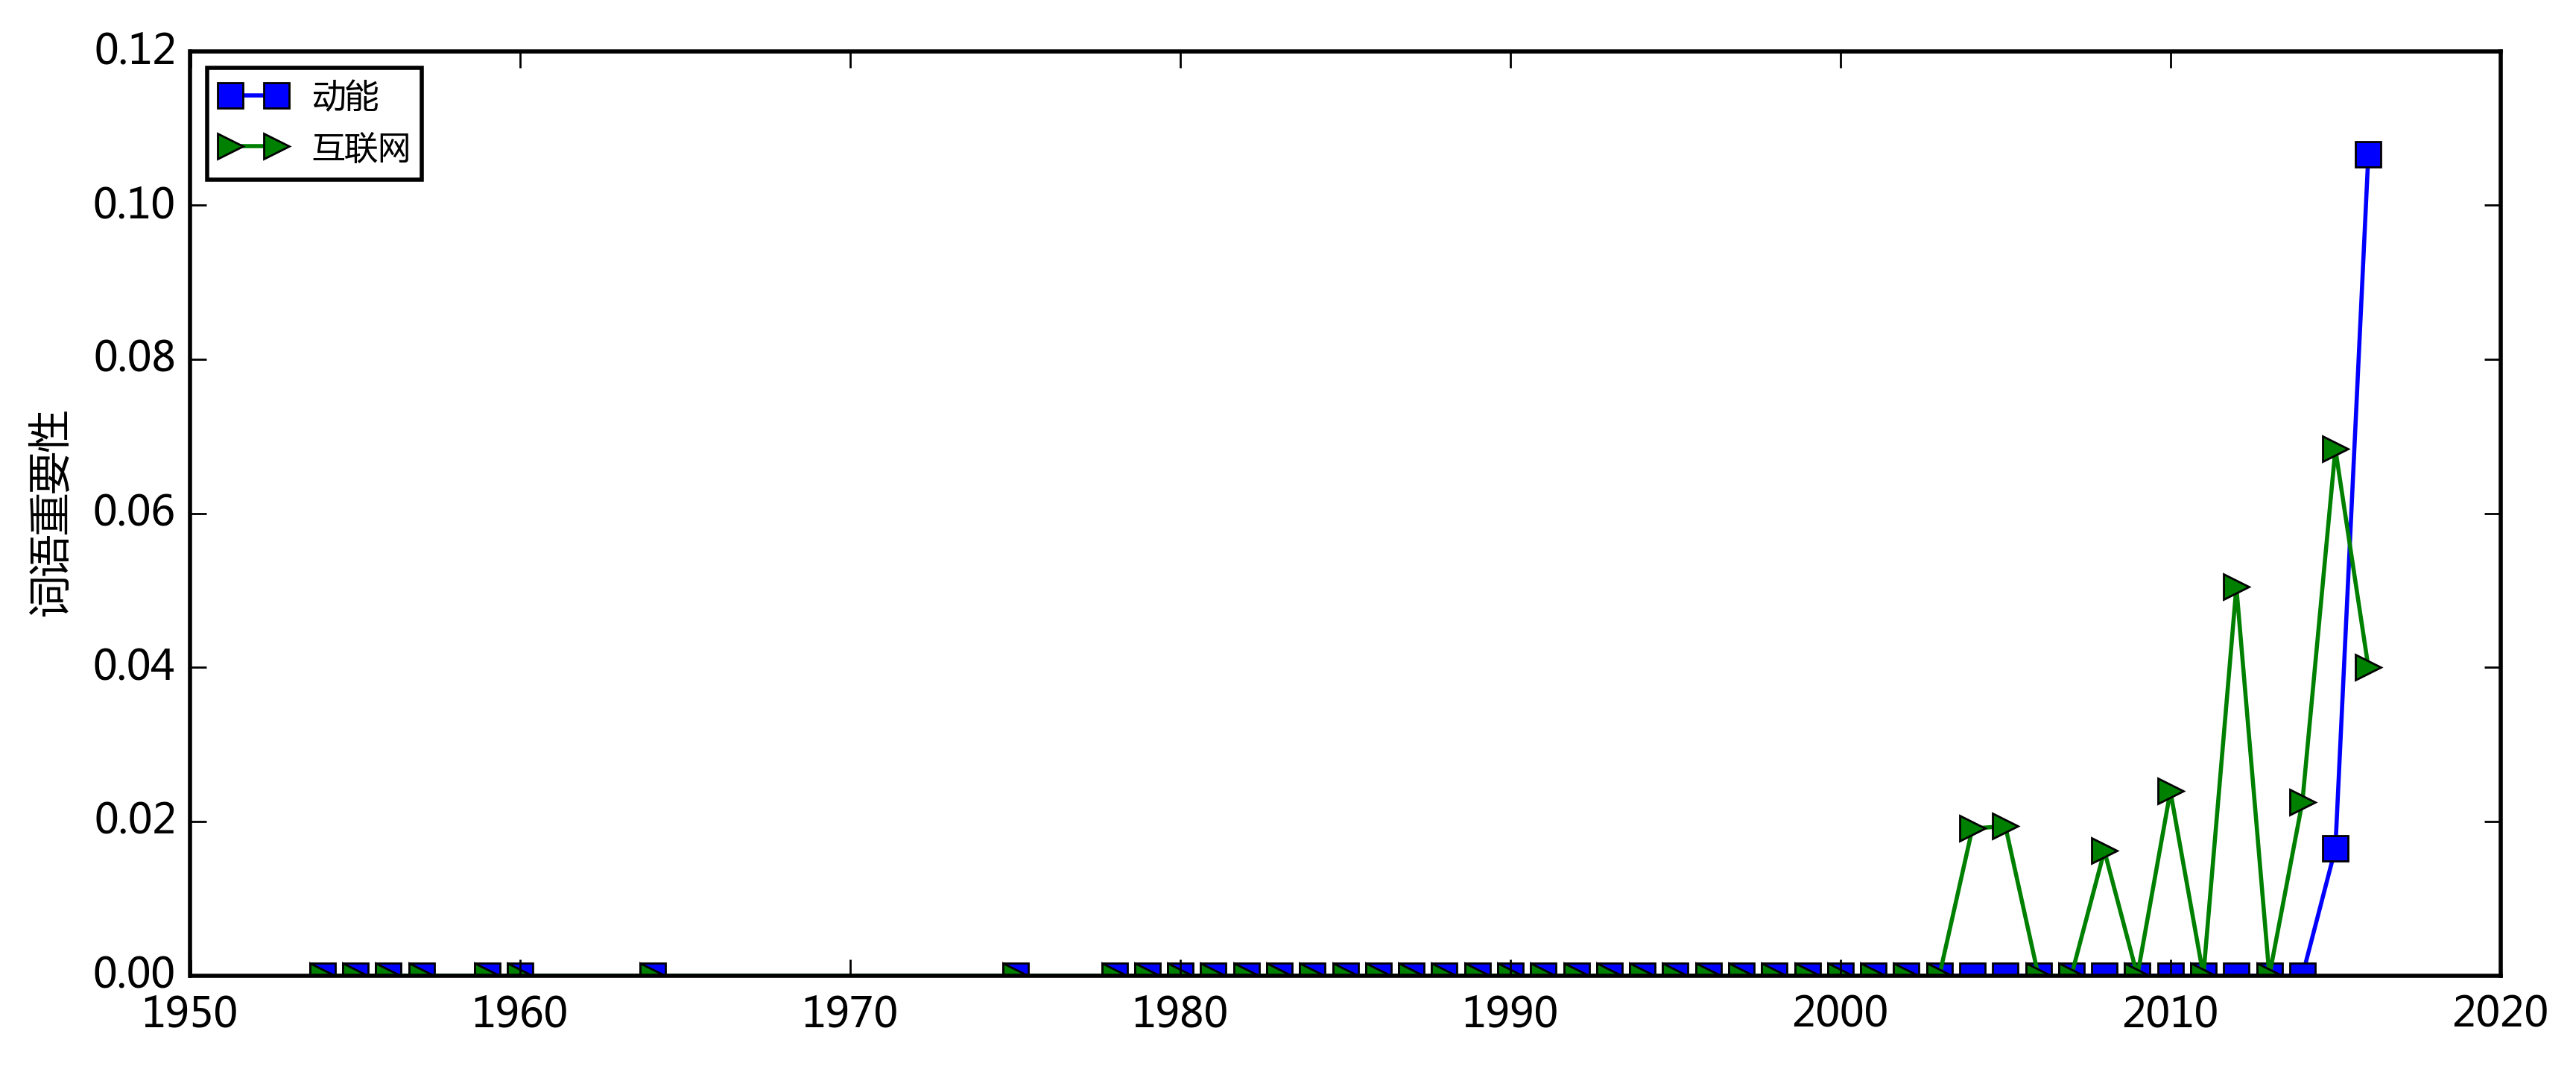

In [363]:
plotEvolution(u'动能', 'b', '-', 's')
plotEvolution(u'互联网', 'g', '-', '>')

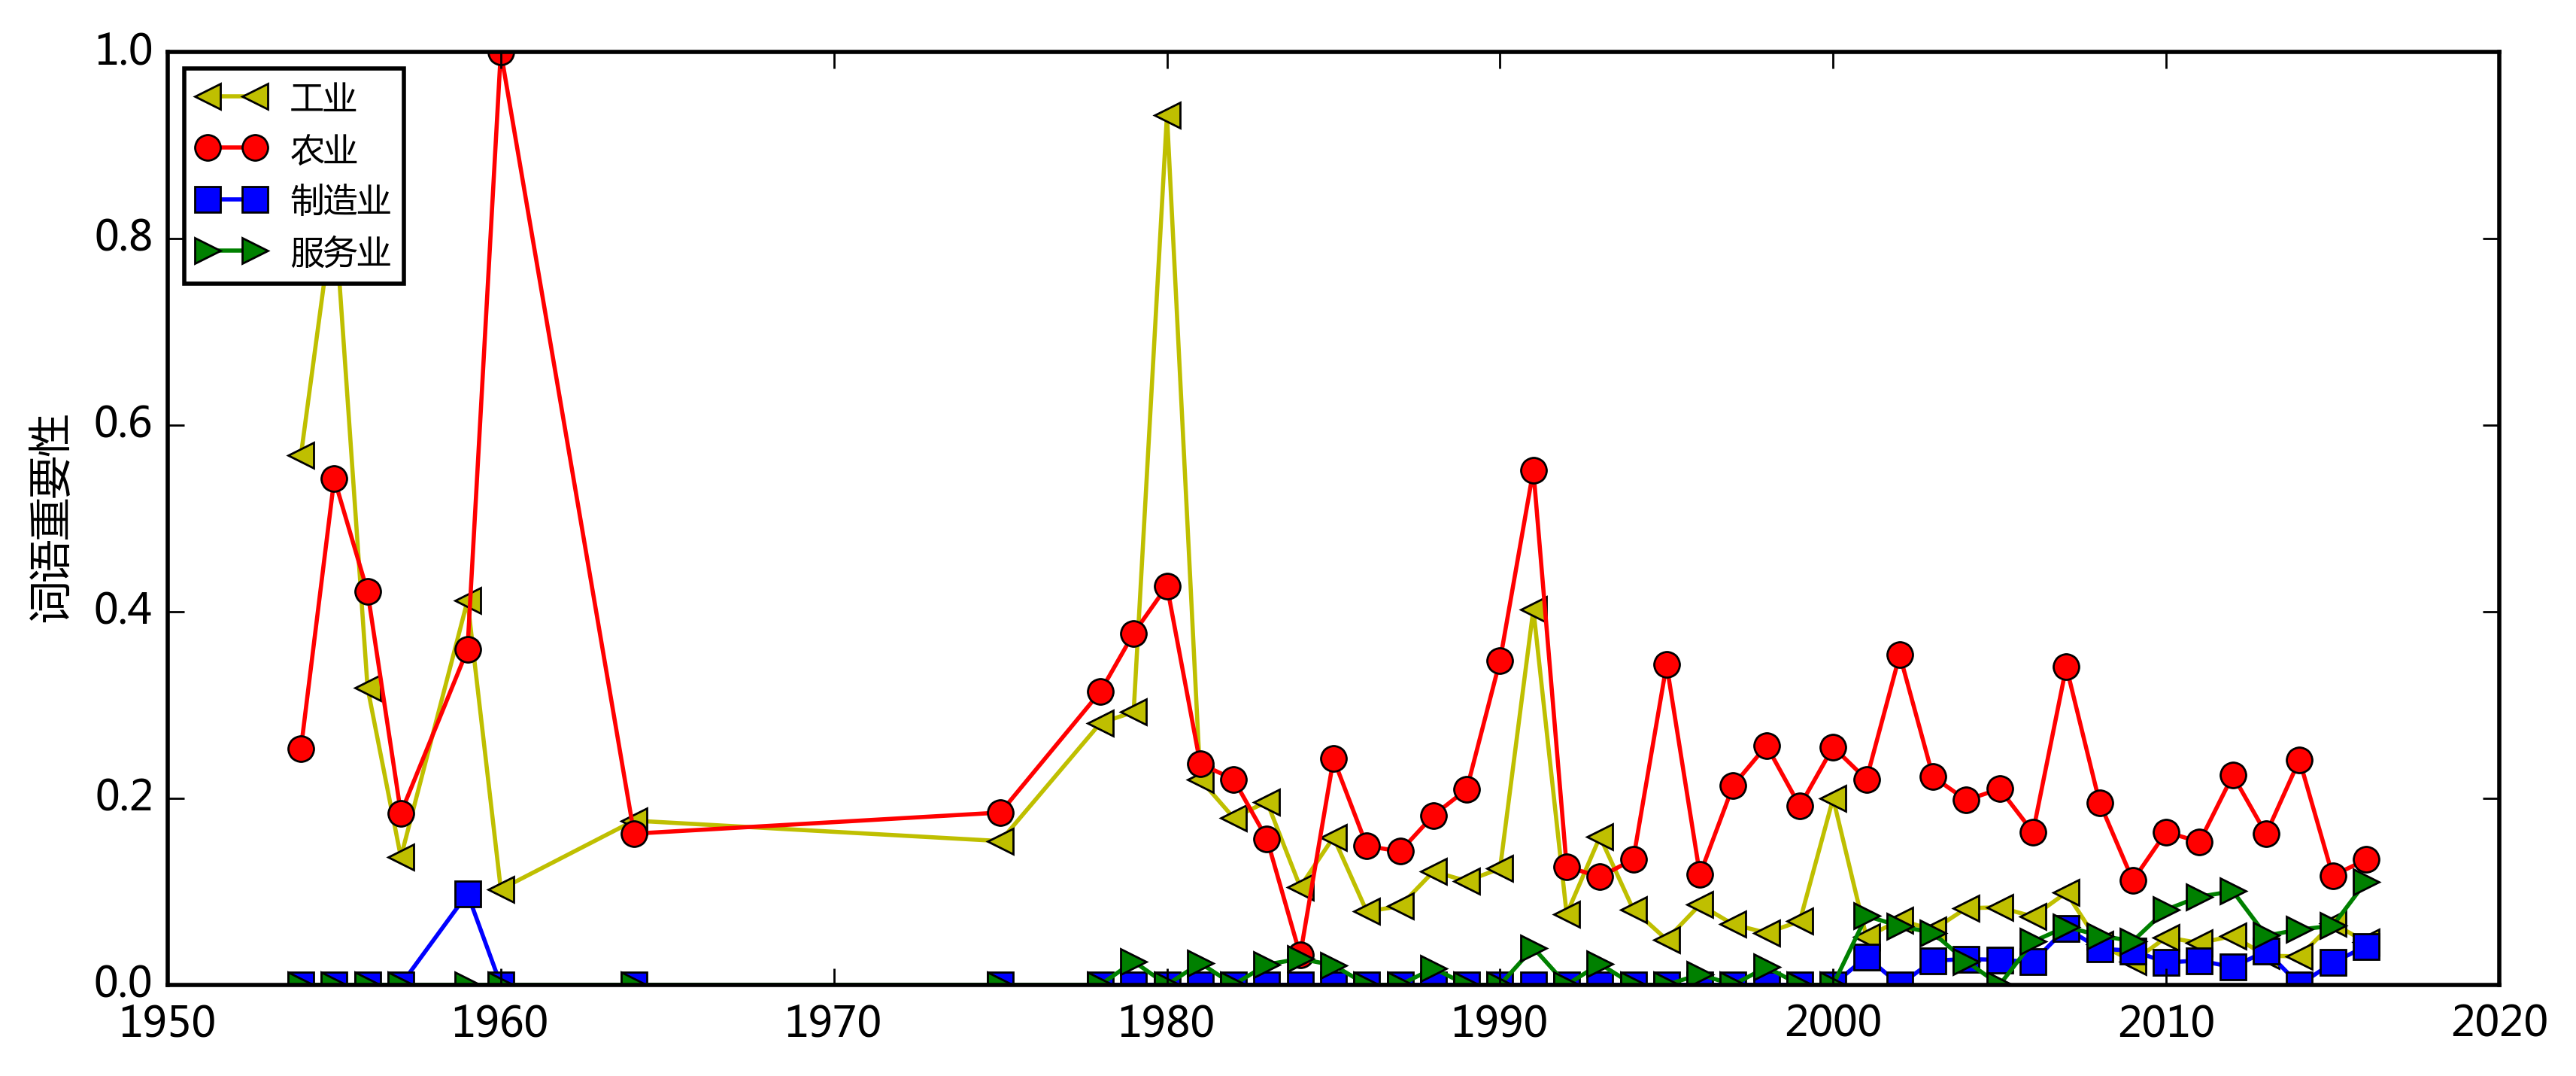

In [364]:
plotEvolution(u'工业', 'y', '-', '<')
plotEvolution(u'农业', 'r', '-', 'o')
plotEvolution(u'制造业', 'b', '-', 's')
plotEvolution(u'服务业', 'g', '-', '>')


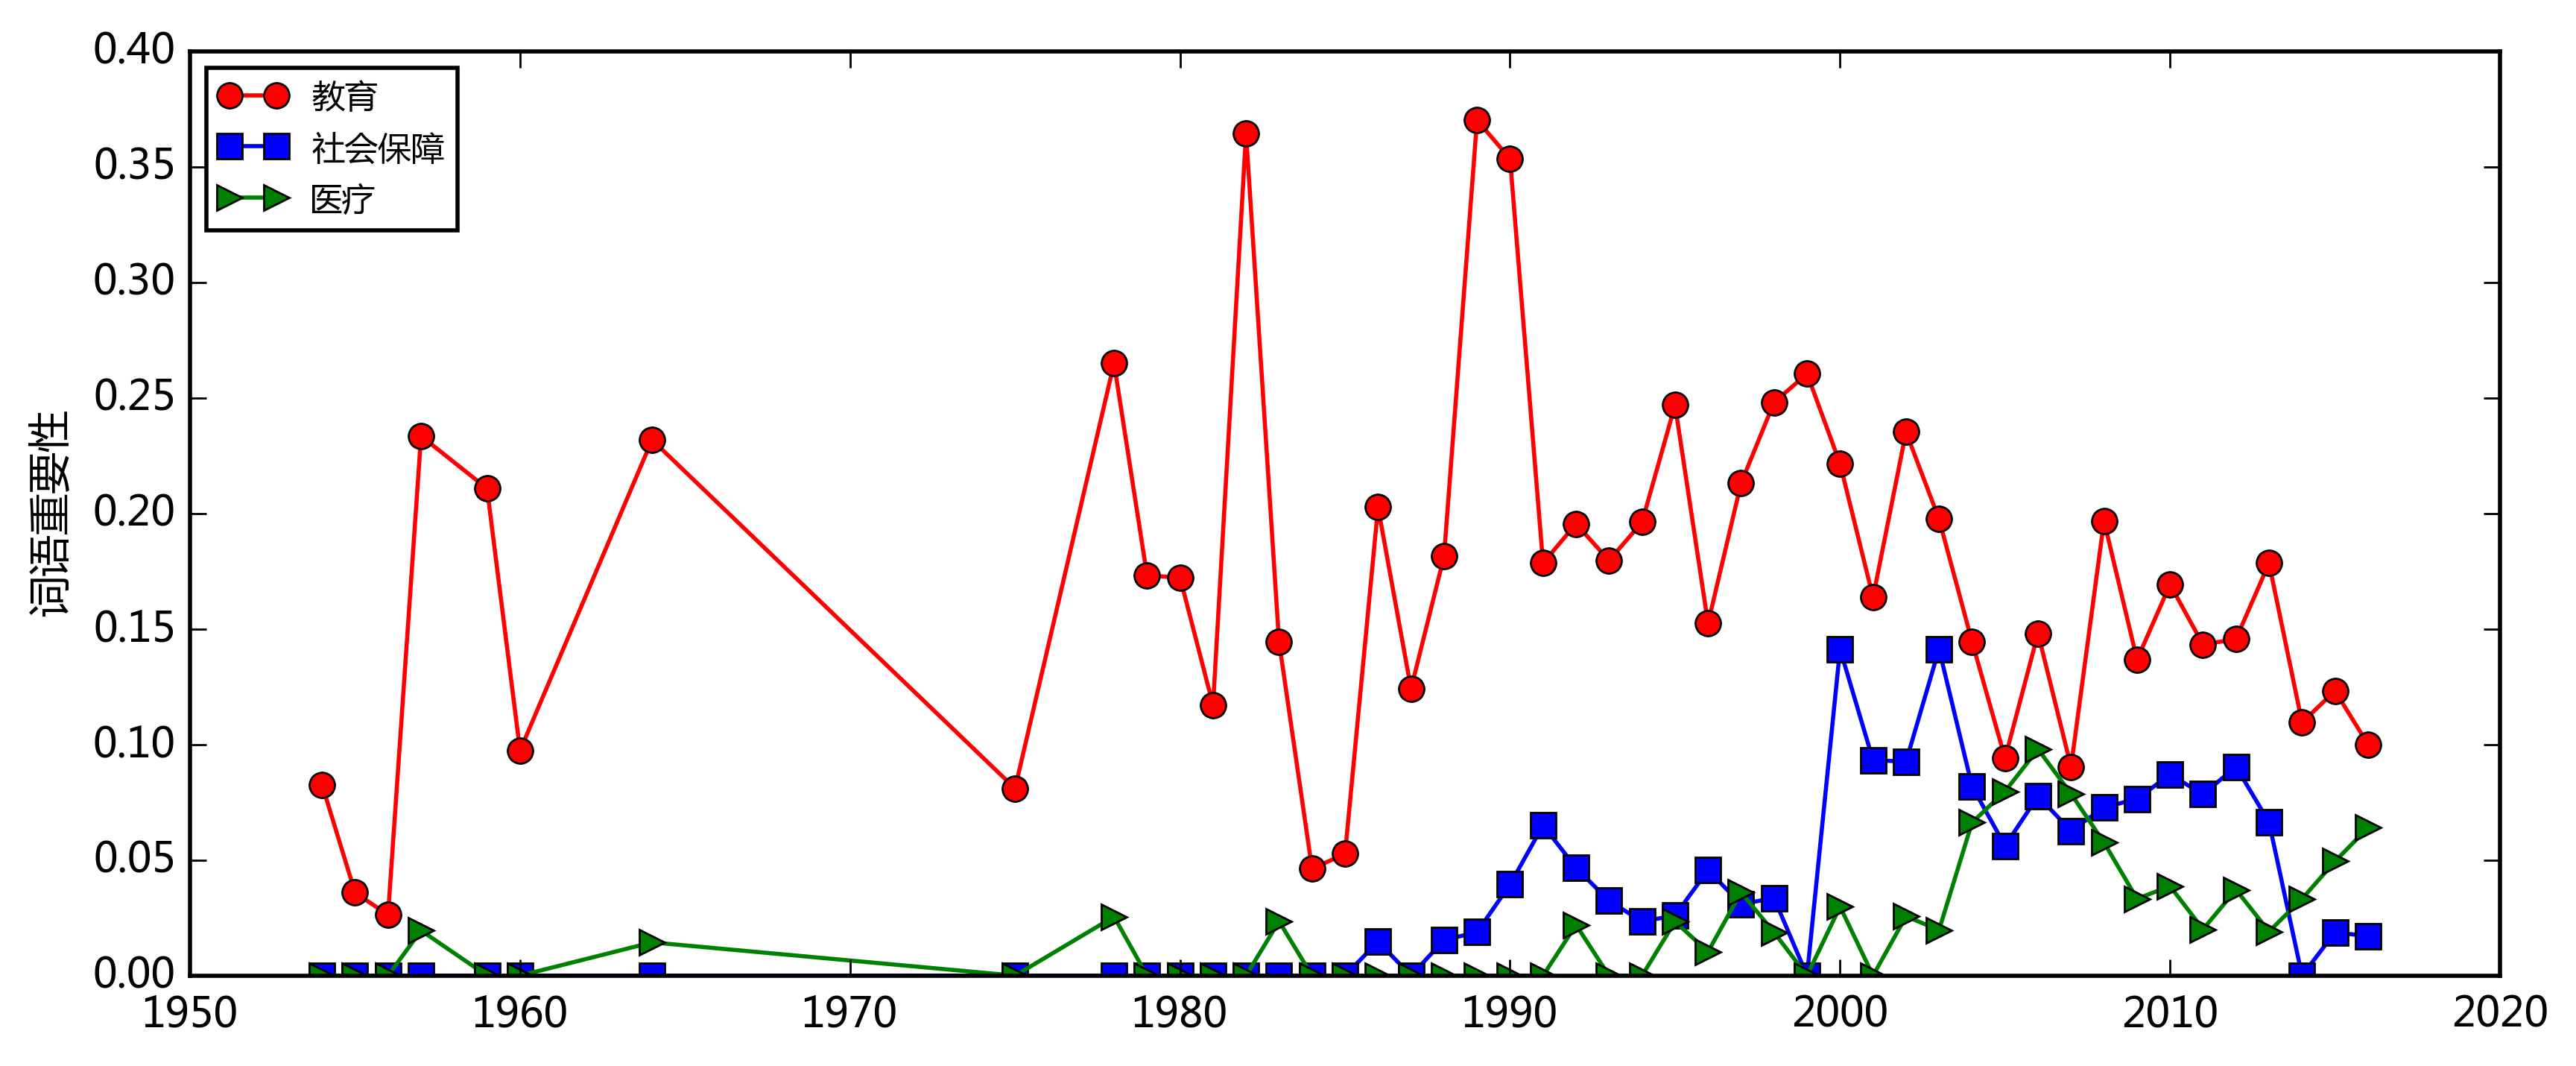

In [362]:
plotEvolution(u'教育', 'r', '-', 'o')
plotEvolution(u'社会保障', 'b', '-', 's')
plotEvolution(u'医疗', 'g', '-', '>')


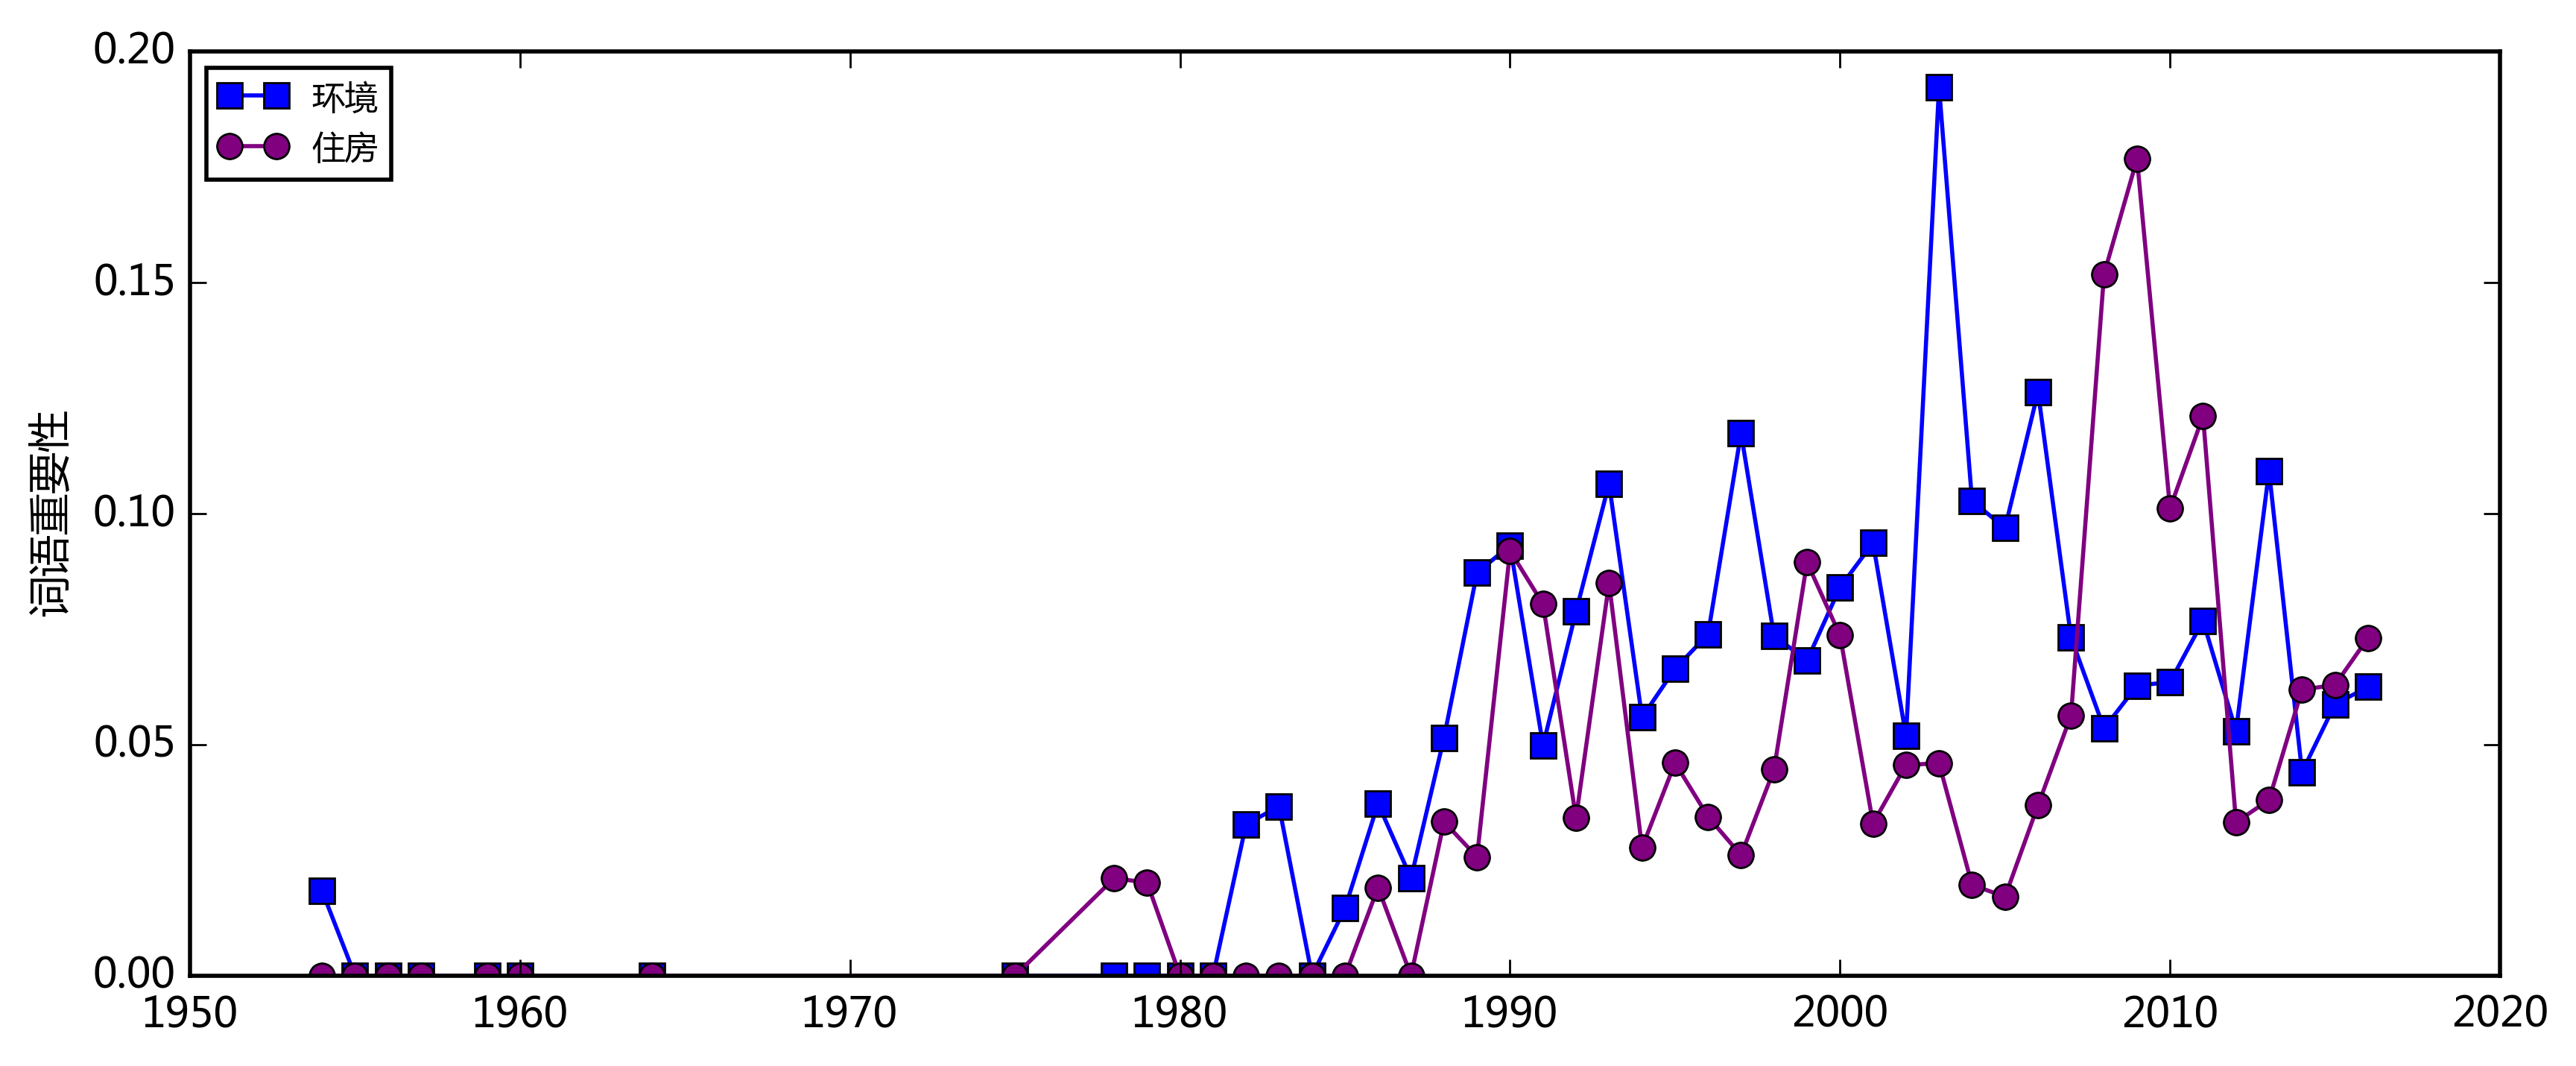

In [356]:
plotEvolution(u'环境', 'b', '-', 's')
plotEvolution(u'住房', 'purple', '-', 'o')

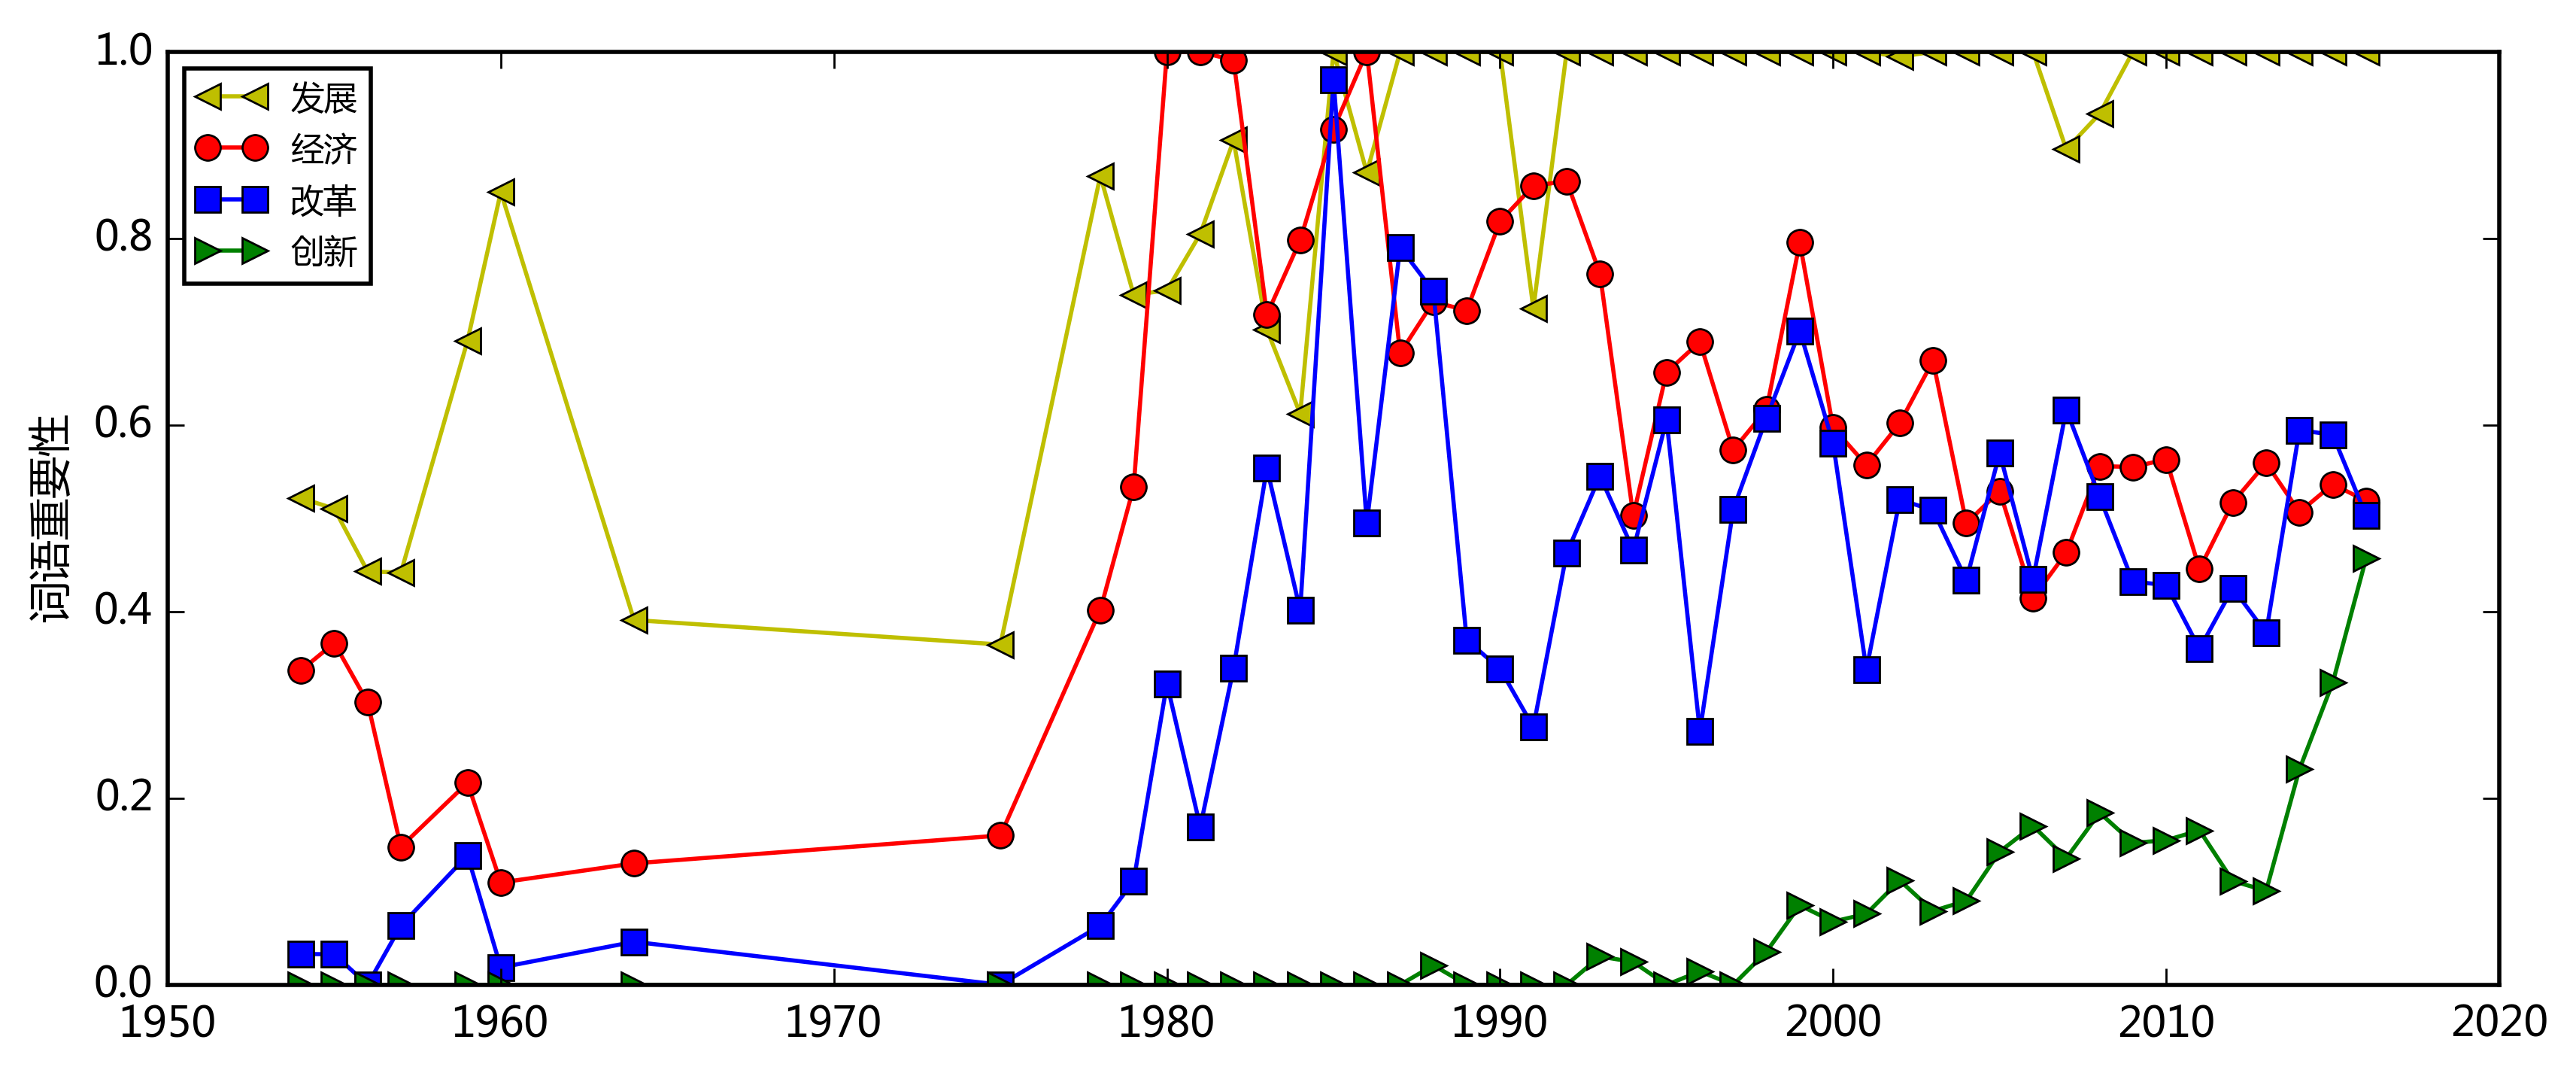

In [357]:
plotEvolution(u'发展', 'y', '-', '<')
plotEvolution(u'经济', 'r', '-', 'o')
plotEvolution(u'改革', 'b', '-', 's')
plotEvolution(u'创新', 'g', '-', '>')

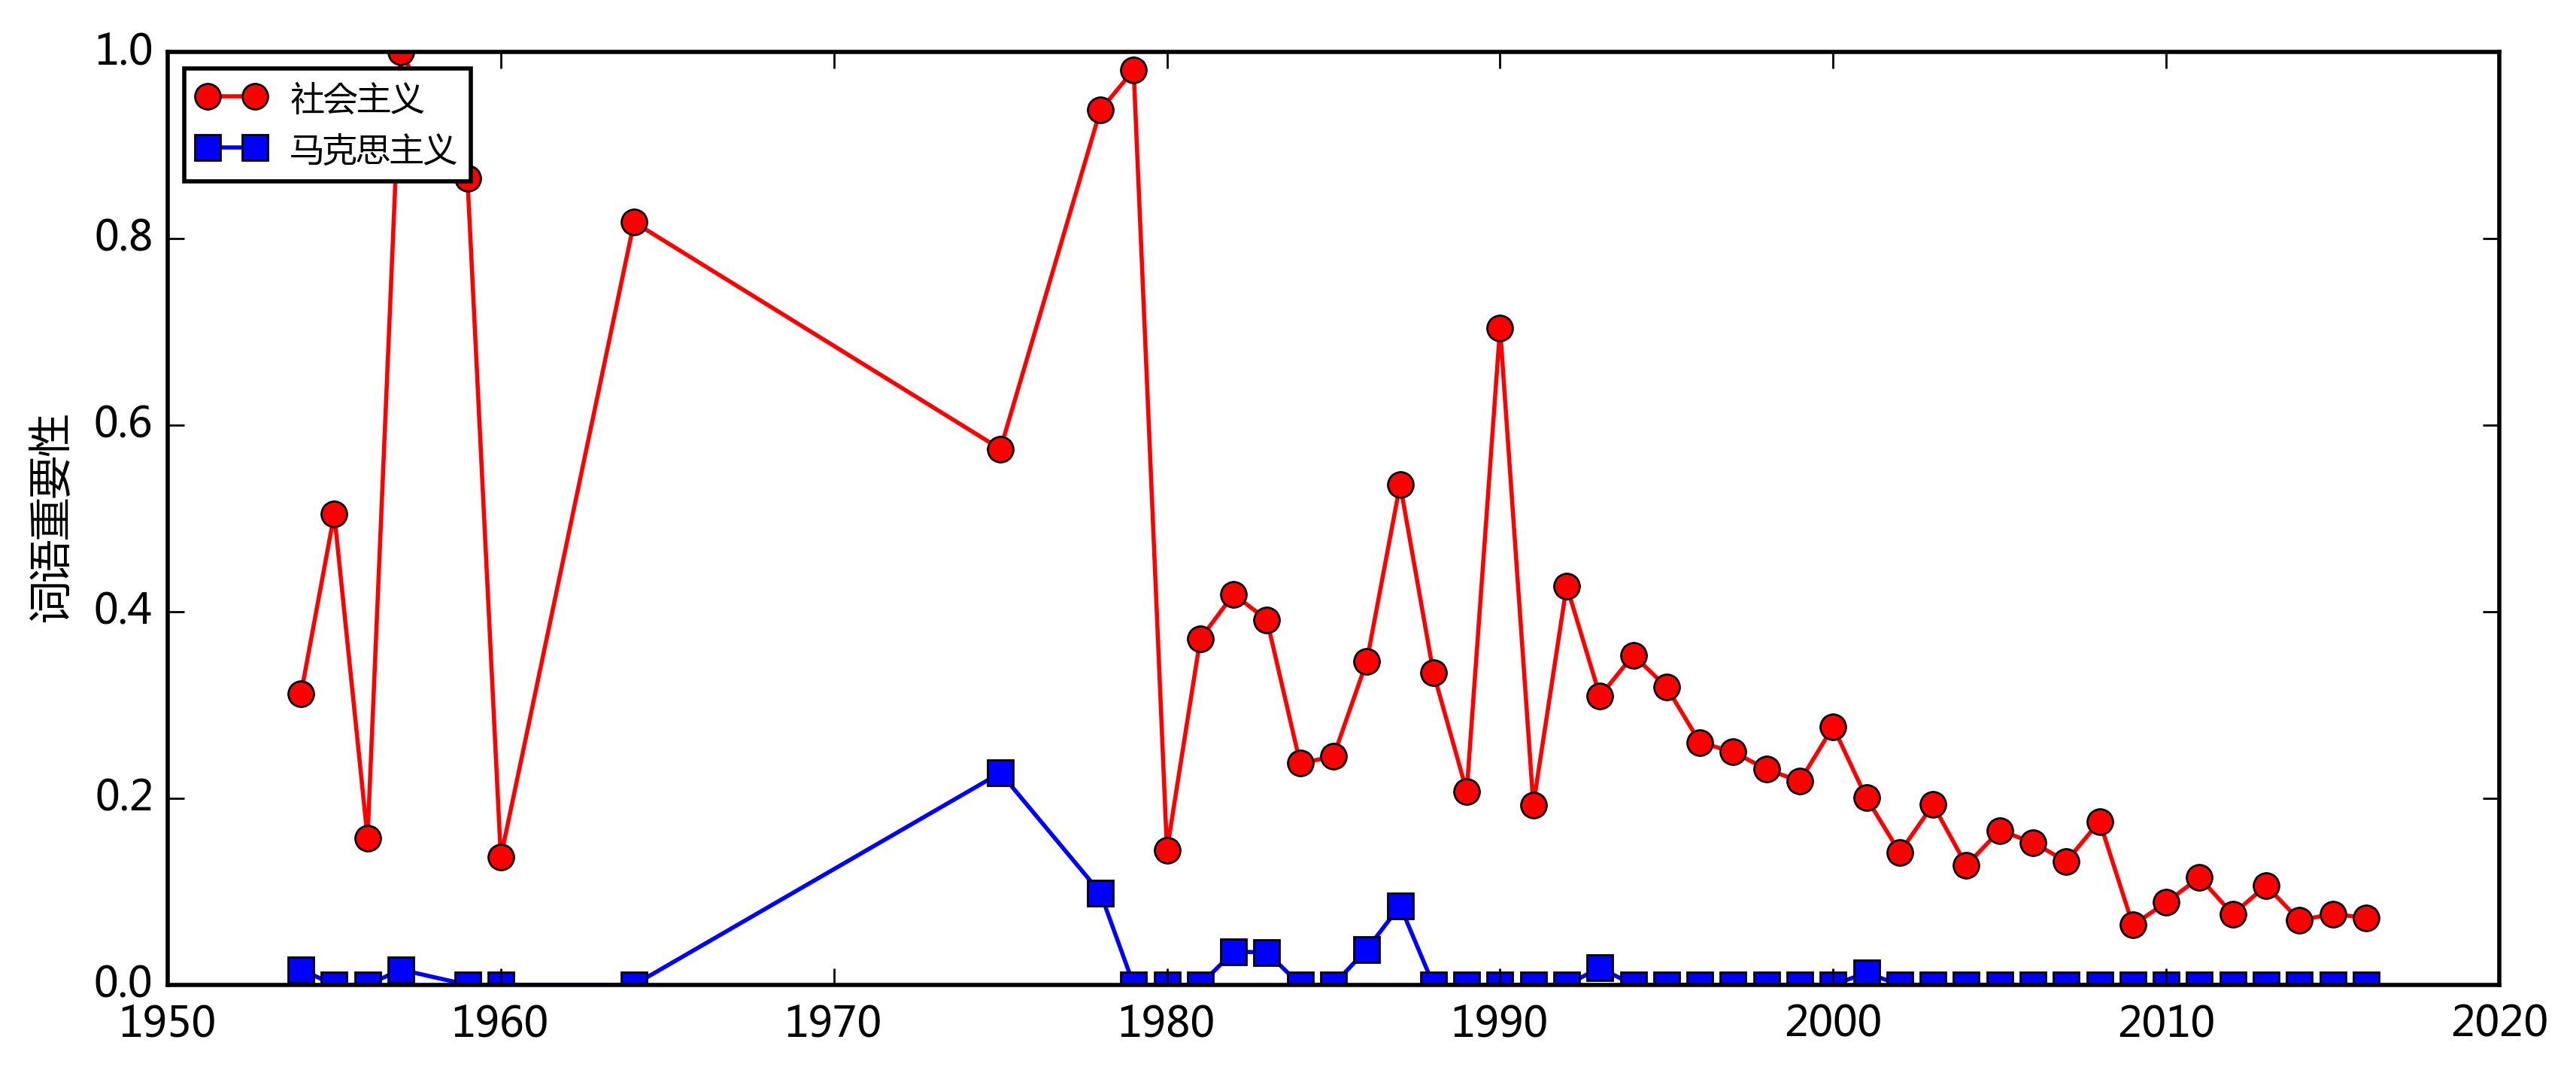

In [359]:
plotEvolution(u'社会主义', 'r', '-', 'o')
plotEvolution(u'马克思主义', 'b', '-', 's')

![image.png](images/end.png)